### Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Exploratory Data Analysis

In [48]:
data = pd.read_csv('Data/DisneylandReviews.csv', encoding='latin1')
data = data.drop_duplicates()
data = data.drop('Review_ID', axis=1)
data = data.drop('Year_Month', axis=1)
data = data.drop('Reviewer_Location', axis=1)
data = data.drop('Branch', axis=1)
data

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."
...,...,...
42651,5,i went to disneyland paris in july 03 and thou...
42652,5,2 adults and 1 child of 11 visited Disneyland ...
42653,5,My eleven year old daughter and myself went to...
42654,4,"This hotel, part of the Disneyland Paris compl..."


In [49]:
data.isnull().sum()

Rating         0
Review_Text    0
dtype: int64

We are going to divide our data into train and test datasets. And create out target column.

In [50]:
def get_setiment(score):
    if score == 3:
        return 0 # neutral
    
    if score > 3:
        return 1 # positive
    
    return -1 # negative

data['Sentiment'] = data['Rating'].apply(get_setiment)
data = data.drop('Rating', axis=1)

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Sentiment'])

In [51]:
data_train.shape

(34115, 2)

In [52]:
data_test.shape

(8529, 2)

In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34115 entries, 34820 to 37724
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  34115 non-null  object
 1   Sentiment    34115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 799.6+ KB


In [54]:
data_train.describe()

,Sentiment
count,34115.000000
mean,0.710186
std,0.613111
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Text(0, 0.5, 'Count')

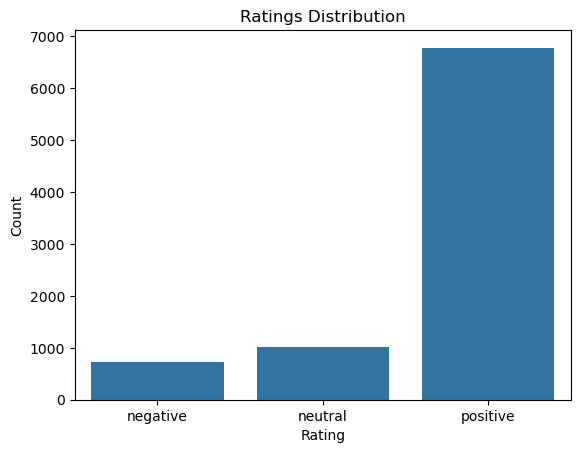

In [55]:
values = data_test.groupby('Sentiment').count().iloc[:,0]

sns.barplot(x = ['negative', 'neutral', 'positive'], y = values, color='#1f77b4')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

So we should keep in mind that our data is extremely imbalanced. This may influence our ML models.
Due to the fact that our dataset is big and our resources are super limited. I will keep in the training set all negative reviews and the same number of neutral and positive

In [56]:
# So we should keep in mind that our data is extremely imbalanced. This may influence our ML models.
# Due to the fact that our dataset is big and our resources are super limited. I will keep in the training set all negative reviews and the same number of neutral and positive

data_train_neg = data_train[data_train['Sentiment'] == -1]
data_train_neutral = data_train[data_train['Sentiment'] == 0][:data_train_neg.shape[0]]
data_train_positive = data_train[data_train['Sentiment'] == 1][:data_train_neg.shape[0]]

data_train = pd.concat([data_train_neg, data_train_neutral, data_train_positive])
data_train

,Review_Text,Sentiment
32204,If the Disney trademark wasn't part of the par...,-1
5371,Visited with a friend and her two early teen k...,-1
6207,We were very disappointed with the fake Cinder...,-1
14709,"The size of this park is tiny, definitely not ...",-1
34051,"Big Disney fan ,but what a disappointment! Fir...",-1
...,...,...
6759,The rides at disneyland are rightly for the sm...,1
11920,"Always clean, helpful staff, and literally hap...",1
26773,"Try not to go in the Summer, or on the Weekend...",1
21330,"After growing up going to DisneyWorld, The Lan...",1


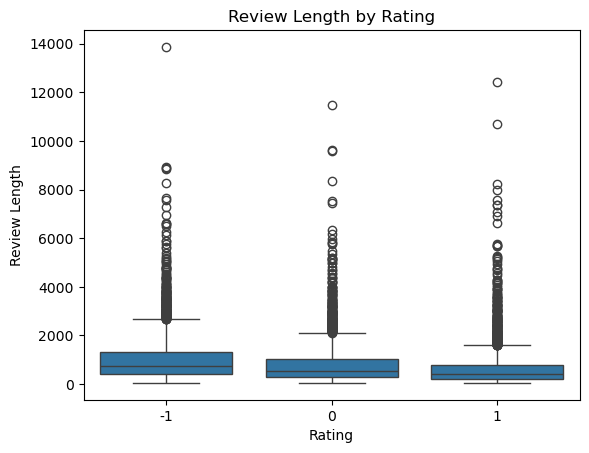

In [57]:
data_train['review_length'] = data_train['Review_Text'].apply(len)

sns.boxplot(x='Sentiment', y='review_length', data=data_train)
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')

data_train = data_train.drop('review_length', axis=1)

We observe that reviews with low ratings (1 and 2) are on average longer, meanwhile reviews with high ratings are shorter.

In [58]:
data_train.to_csv('Data/data_train.csv', index=False)

In [59]:
# cutting the test set to have the same number of samples for each class
data_test_neg = data_test[data_test['Sentiment'] == -1]
data_test_neutral = data_test[data_test['Sentiment'] == 0][:data_test_neg.shape[0]]
data_test_positive = data_test[data_test['Sentiment'] == 1][:data_test_neg.shape[0]]

In [60]:
# cutting the test set to have the same number of samples for each class

data_test = pd.concat([data_test_neg, data_test_neutral, data_test_positive])
data_test

,Review_Text,Sentiment
30407,I must be nuts to have been talked into going ...,-1
30730,Went here in January for a day trip with my fr...,-1
30577,Let me start off by saying I love Disney parks...,-1
42242,We stayed at Disneyland Paris on 31st January ...,-1
9604,HK disney is boring go ocean park go la disn...,-1
...,...,...
1939,"Definitely smaller than the one in Paris, the ...",1
7694,Even thought the Ticket was so expensive for o...,1
7885,We had a great day at Disneyland. I have read ...,1
14428,We just got home from our first trip to Disney...,1


In [61]:
data_test.to_csv('Data/data_test.csv', index=False)